<a href="https://colab.research.google.com/github/fertorresfs/Image-Classification-with-CNNs-using-Keras/blob/master/Image_Classification_with_CNNs_using_Keras_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importar Bibliotecas

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Etapa 2: Carregar e Pré-processar Dados


In [24]:
# Carregando o conjunto de dados CIFAR-10 e selecionando 3 classes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

def get_three_classes(x, y, classes=[0, 1, 2]):
    indices = np.concatenate([np.where(y == c)[0] for c in classes])
    x = x[indices]
    y = y[indices]
    np.random.seed(42)
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    x = x[indices]
    y = y[indices]
    y = tf.keras.utils.to_categorical(y, num_classes=len(classes))
    return x, y

In [25]:
x_train, y_train = get_three_classes(x_train, y_train.flatten())
x_test, y_test = get_three_classes(x_test, y_test.flatten())

In [26]:
# Normalização (Z-score normalization)
x_mean = np.mean(x_train, axis=(0, 1, 2))
x_std = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

class_names = ['airplane', 'automobile', 'bird']

# Etapa 3: Criar o Modelo

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 590,755 (2.25 MB)

 Trainable params: 590,563 (2.25 MB)

 Non-trainable params: 192 (768.00 B)

# Etapa 4: Configurar Callbacks

In [29]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Etapa 5: Aumentar Dados (Data Augmentation)

In [30]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Etapa 6: Treinar o Modelo

In [31]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 - 19s - 82ms/step - accuracy: 0.6475 - loss: 0.8554 - val_accuracy: 0.6597 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 2/50
235/235 - 12s - 53ms/step - accuracy: 0.7206 - loss: 0.6855 - val_accuracy: 0.8107 - val_loss: 0.4560 - learning_rate: 0.0010
Epoch 3/50
235/235 - 11s - 45ms/step - accuracy: 0.7429 - loss: 0.6175 - val_accuracy: 0.8097 - val_loss: 0.4509 - learning_rate: 0.0010
Epoch 4/50
235/235 - 11s - 46ms/step - accuracy: 0.7640 - loss: 0.5792 - val_accuracy: 0.7817 - val_loss: 0.5243 - learning_rate: 0.0010
Epoch 5/50
235/235 - 20s - 87ms/step - accuracy: 0.7839 - loss: 0.5445 - val_accuracy: 0.8547 - val_loss: 0.3660 - learning_rate: 0.0010
Epoch 6/50
235/235 - 10s - 43ms/step - accuracy: 0.7954 - loss: 0.5160 - val_accuracy: 0.8613 - val_loss: 0.3509 - learning_rate: 0.0010
Epoch 7/50
235/235 - 9s - 39ms/step - accuracy: 0.8081 - loss: 0.4973 - val_accuracy: 0.8773 - val_loss: 0.3259 - learning_rate: 0.0010
Epoch 8/50
235/235 - 12s - 49ms/step - accuracy: 0.81

# Etapa 7: Avaliar o Modelo e Visualizar Resultados

In [32]:
# Avaliação
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Loss: 0.2442
Accuracy: 0.9087


In [33]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


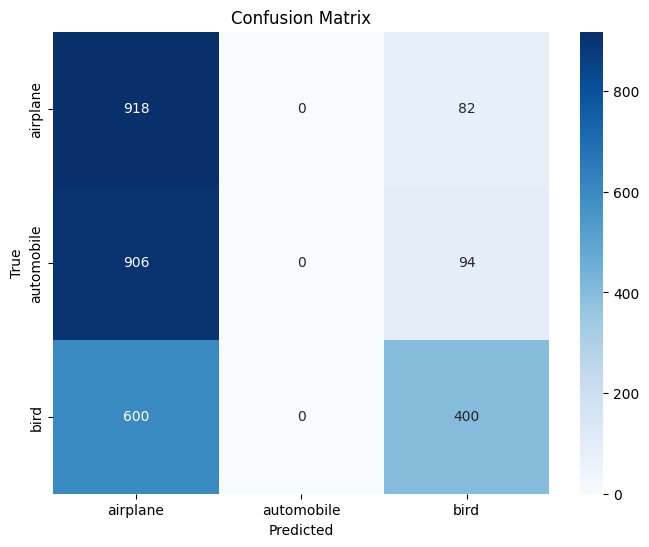

In [20]:
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

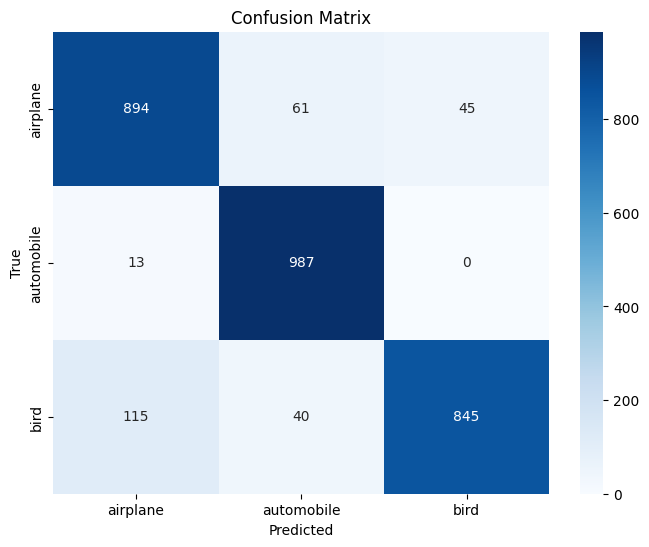

In [34]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Função para visualizar exemplos
def show_random_examples(x, y_true, y_pred, class_names):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False) # gerar indices fora da função
    x = x[indices]
    y_true = y_true[indices]
    y_pred = y_pred[indices]

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])  # Acessa o i-ésimo elemento do subconjunto x
        plt.xticks([])
        plt.yticks([])
        true_label = np.argmax(y_true[i])
        pred_label = np.argmax(y_pred[i])
        color = 'green' if true_label == pred_label else 'red'
        plt.xlabel(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}", color=color)
    plt.show()

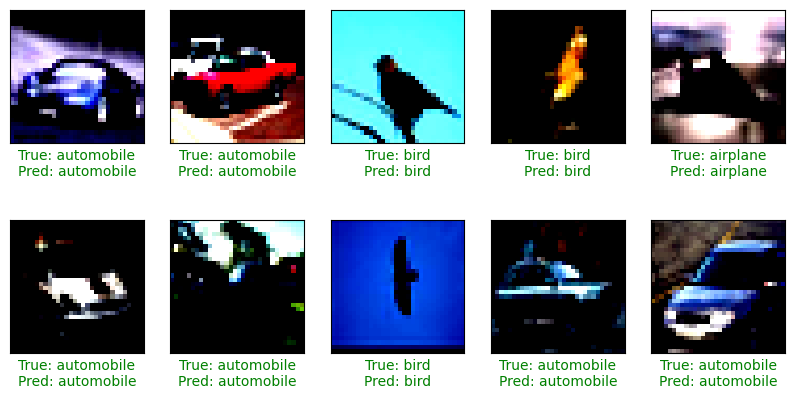

In [40]:
# Visualizando exemplos com as predições
show_random_examples(x_test, y_test, y_pred, class_names)

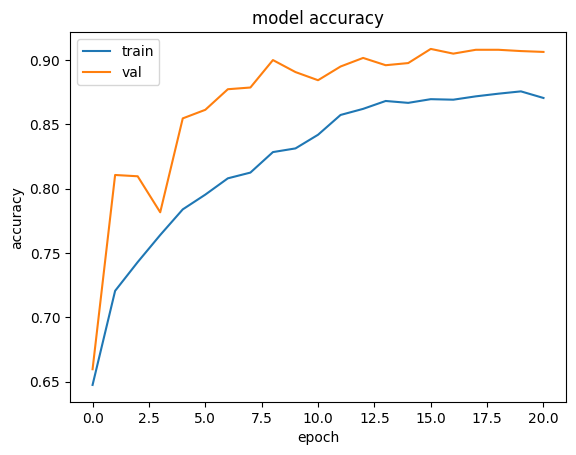

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

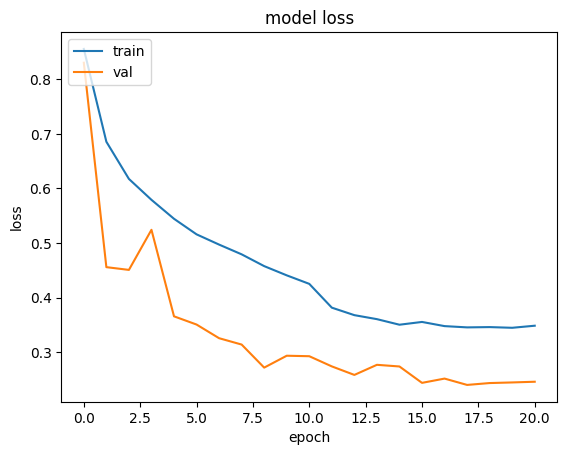

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()